In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import shap
import pickle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install pyngrok -q

In [ ]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df=df.drop(columns=["customerID"])

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
numerical_features_list=["tenure","MonthlyCharges","TotalCharges"]
for col in df.columns:
  if col not in numerical_features_list:
    print(col,df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [ ]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
len(df[df["TotalCharges"]==" "])

11

In [ ]:
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0.0"})

In [ ]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
churned=(df['Churn']=='Yes').sum()
retained=(df['Churn']=='No').sum()
print( f"Churned: {churned}")
print( f"Non-churned: {retained}")

Churned: 1869
Non-churned: 5174


In [ ]:
if df['Churn'].dtype=='object':
  df['Churn']=df['Churn'].map({'Yes':1,'No':0})
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
corr_matrix=df[numeric_cols].corr()
corr_percent=corr_matrix['Churn']*100
print("Correlation with Churn Rate:")
print(corr_percent.sort_values(ascending=False))

Correlation with Churn Rate:
Churn             100.000000
MonthlyCharges     19.335642
SeniorCitizen      15.088933
TotalCharges      -19.832426
tenure            -35.222867
Name: Churn, dtype: float64


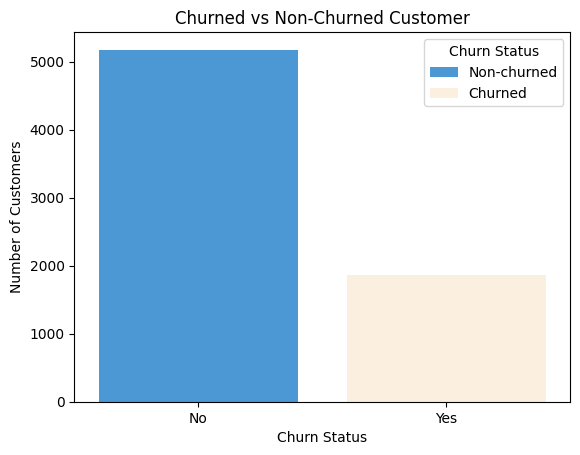

In [ ]:
sns.countplot(x='Churn',data=df, palette={'1':'#fff0db','0':'#349beb'})
plt.title("Churned vs Non-Churned Customer")
plt.xticks([0,1],['No','Yes'])
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.legend(title="Churn Status", labels=['Non-churned', 'Churned'])
plt.show()

In [ ]:
def plot_histogram(df, column_name):
  plt.figure(figsize=(10,6))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")
  col_mean=df[column_name].mean()
  col_median=df[column_name].median()
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")
  plt.legend()
  plt.show()

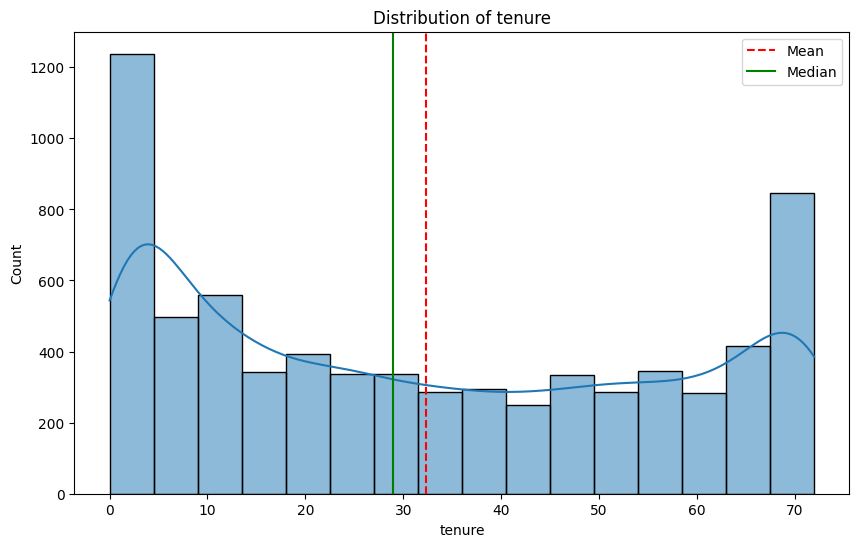

In [ ]:
plot_histogram(df, "tenure")

In [ ]:
def plot_boxplot(df, column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

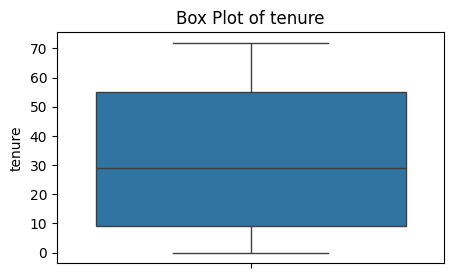

In [ ]:
plot_boxplot(df,"tenure")

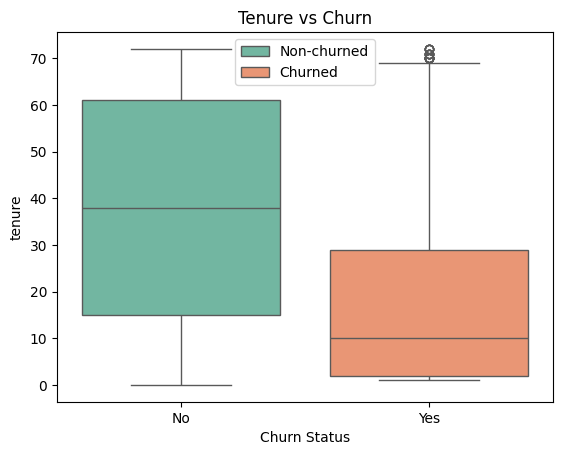

In [ ]:
sns.boxplot(x="Churn", y="tenure", data=df, palette='Set2')
plt.title("Tenure vs Churn")
plt.xticks([0,1],['No','Yes'])
plt.xlabel("Churn Status")
plt.ylabel("tenure")
plt.legend(labels=['Non-churned', 'Churned'])
plt.show()

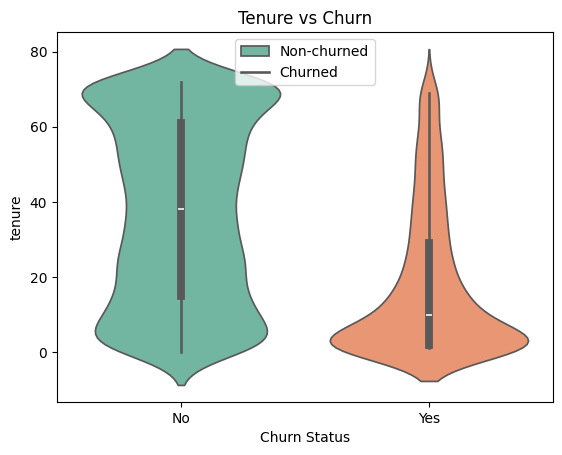

In [ ]:
sns.violinplot(x="Churn", y="tenure", data=df, palette='Set2')
plt.title("Tenure vs Churn")
plt.xticks([0,1],['No','Yes'])
plt.xlabel("Churn Status")
plt.ylabel("tenure")
plt.legend(labels=['Non-churned', 'Churned'])
plt.show()

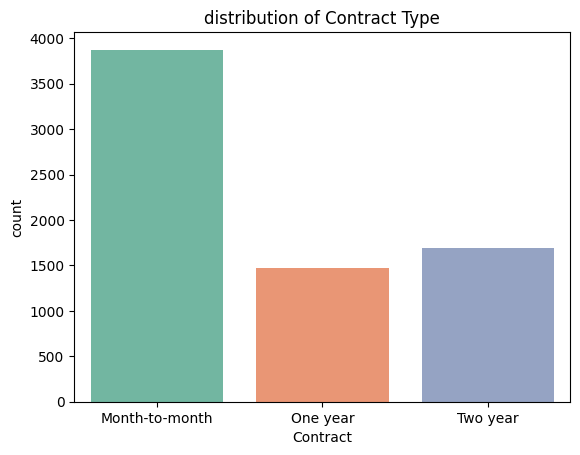

In [ ]:
sns.countplot(x="Contract", data=df, palette="Set2")
plt.title("distribution of Contract Type")
plt.show()

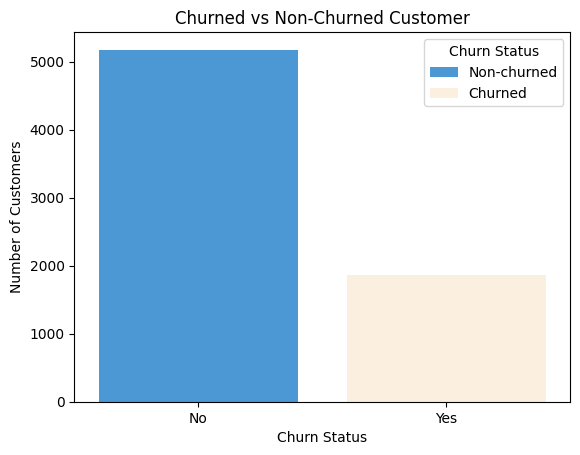

In [ ]:
sns.countplot(x='Churn',data=df, palette={'1':'#fff0db','0':'#349beb'})
plt.title("Churned vs Non-Churned Customer")
plt.xticks([0,1],['No','Yes'])
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.legend(title="Churn Status", labels=['Non-churned', 'Churned'])
plt.show()

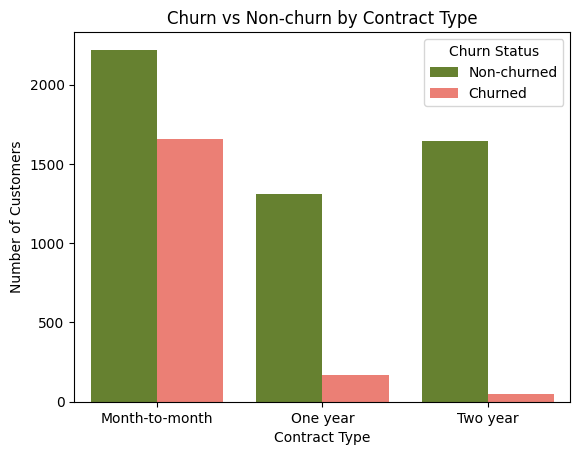

In [ ]:
sns.countplot(x="Contract", hue="Churn", data=df, palette={0:'#6B8E23',1:'#FF6F61'})
plt.title("Churn vs Non-churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn Status", labels=['Non-churned', 'Churned'])
plt.show()

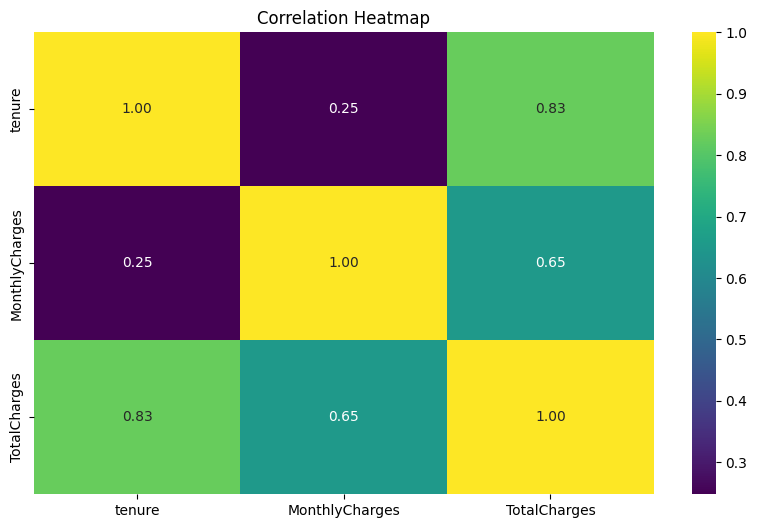

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Overall Churn Rate: 26.54%

Churn Rate by Contract Type (%):
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


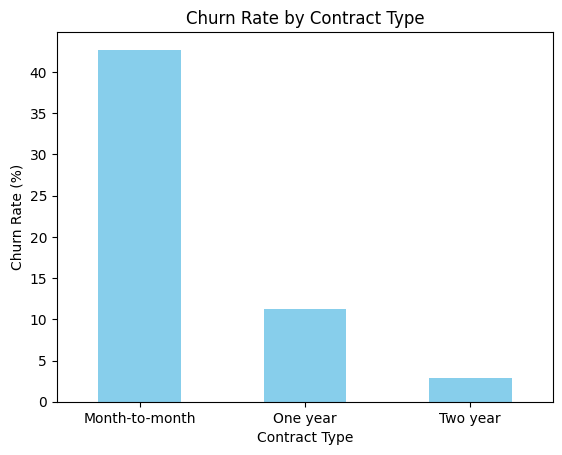


Correlation with Churn:
Churn             100.000000
MonthlyCharges     19.335642
SeniorCitizen      15.088933
TotalCharges      -19.832426
tenure            -35.222867
Name: Churn, dtype: float64


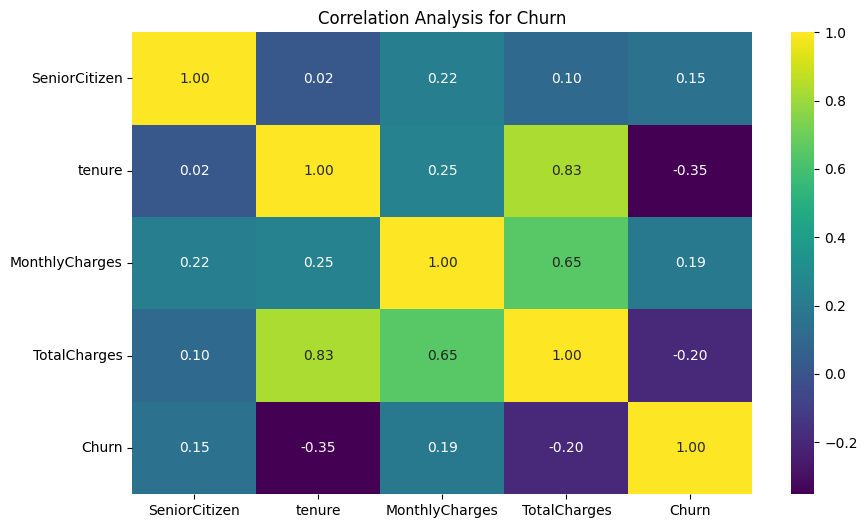


Top Positive Correlations with Churn (%):
MonthlyCharges    19.335642
SeniorCitizen     15.088933
TotalCharges     -19.832426
Name: Churn, dtype: float64

Top Negative Correlations with Churn (%):
tenure          -35.222867
TotalCharges    -19.832426
SeniorCitizen    15.088933
Name: Churn, dtype: float64

Insights:
- Overall churn rate is 26.54%.
- Customers with MonthlyCharges show the strongest positive correlation with churn.
- Customers with tenure show the strongest negative correlation (i.e., retention driver).


In [ ]:
total_customers = len(df)
churned_customers = df['Churn'].sum()
churn_rate = (churned_customers / total_customers) * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")
if 'Contract' in df.columns:
  churn_by_contract = df.groupby('Contract')['Churn'].mean() * 100
  print("\nChurn Rate by Contract Type (%):")
  print(churn_by_contract)

  churn_by_contract.plot(kind='bar', color='skyblue')
  plt.title("Churn Rate by Contract Type")
  plt.xlabel("Contract Type")
  plt.xticks(rotation=0)
  plt.ylabel("Churn Rate (%)")
  plt.show()
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation with Churn:")
print((corr_matrix['Churn'] * 100).sort_values(ascending=False))
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Analysis for Churn")
plt.show()
top_positive = (corr_matrix['Churn'].drop('Churn').sort_values(ascending=False).head(3)) * 100
top_negative = (corr_matrix['Churn'].drop('Churn').sort_values().head(3)) * 100
print("\nTop Positive Correlations with Churn (%):")
print(top_positive)
print("\nTop Negative Correlations with Churn (%):")
print(top_negative)
print("\nInsights:")
print(f"- Overall churn rate is {churn_rate:.2f}%.")
print(f"- Customers with {top_positive.index[0]} show the strongest positive correlation with churn.")
print(f"- Customers with {top_negative.index[0]} show the strongest negative correlation (i.e., retention driver).")




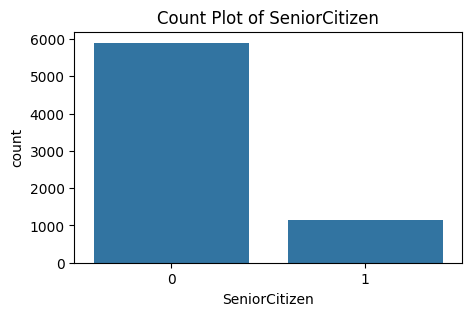

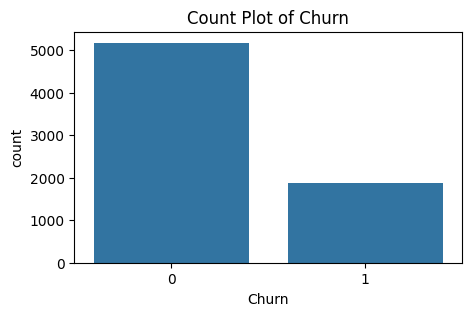

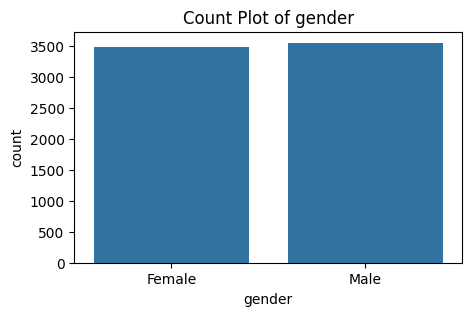

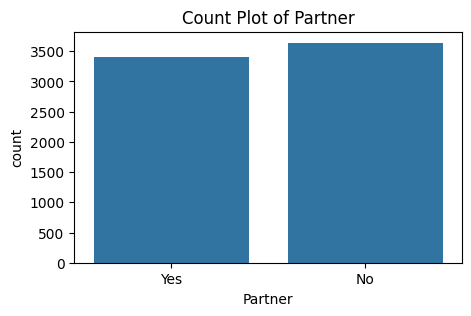

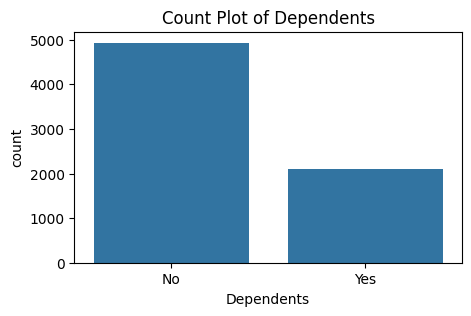

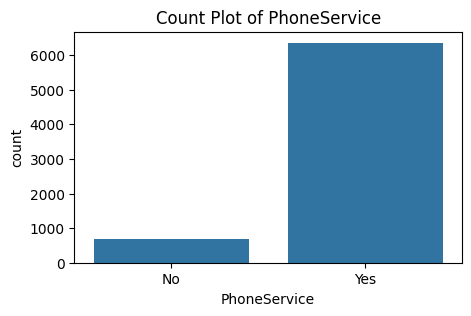

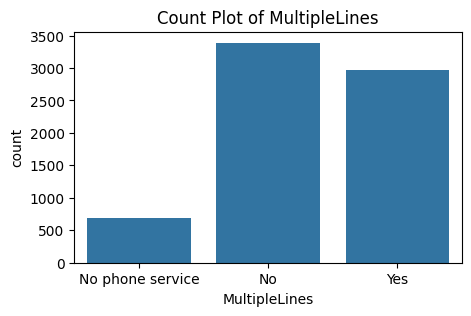

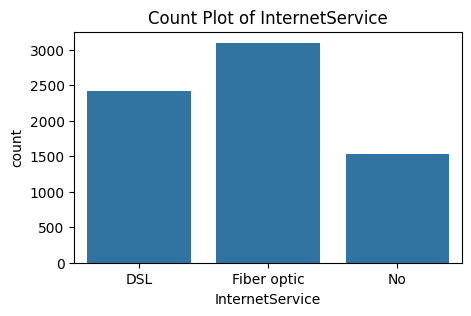

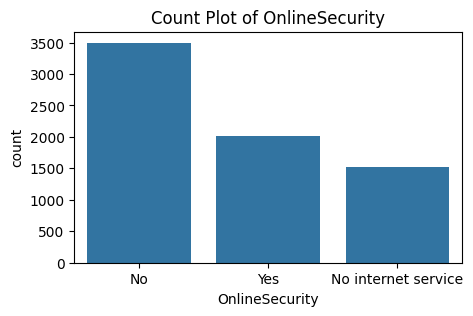

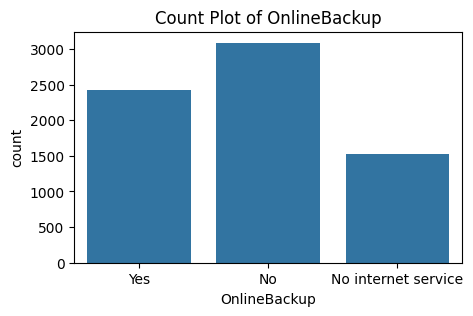

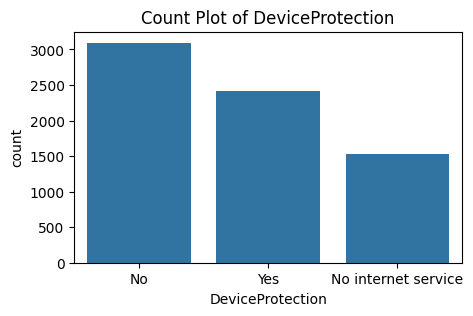

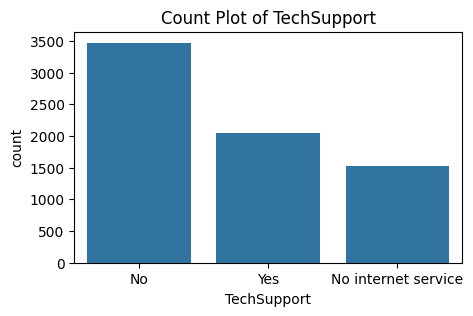

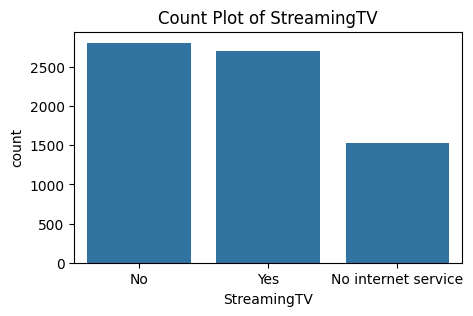

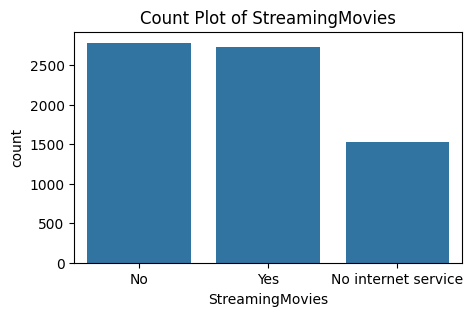

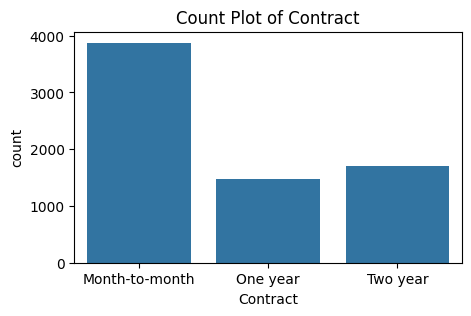

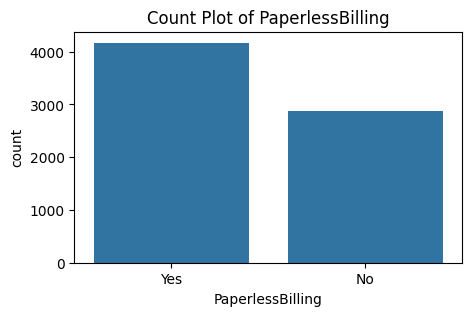

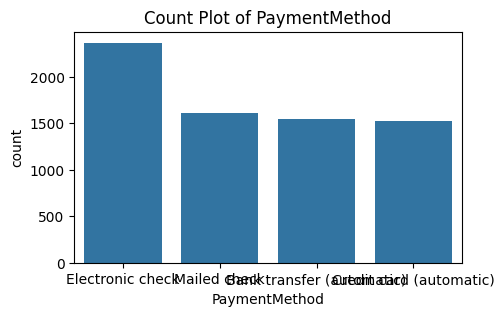

In [ ]:
object_cols=df.select_dtypes(include="object").columns.to_list()
object_cols=["SeniorCitizen","Churn"]+object_cols
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
for  col in df.columns:
  if df[col].dtype=='object':
    df[col]=df[col].fillna(df[col].mode()[0])
  else:
    df[col]=df[col].fillna(df[col].mean())

In [ ]:
object_columns=df.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
encoders={}
for column in object_columns:
  label_encoder=LabelEncoder()
  df[column]=label_encoder.fit_transform(df[column])
  encoders[column]=label_encoder
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders, f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
numerical_features_list=["tenure","MonthlyCharges","TotalCharges"]
scaler=StandardScaler()
df[numerical_features_list]=scaler.fit_transform(df[numerical_features_list])


In [ ]:
df['AvgMonthlyCharges'] = df['TotalCharges'] / df['tenure']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   int64  
 1   SeniorCitizen      7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Dependents         7043 non-null   int64  
 4   tenure             7043 non-null   float64
 5   PhoneService       7043 non-null   int64  
 6   MultipleLines      7043 non-null   int64  
 7   InternetService    7043 non-null   int64  
 8   OnlineSecurity     7043 non-null   int64  
 9   OnlineBackup       7043 non-null   int64  
 10  DeviceProtection   7043 non-null   int64  
 11  TechSupport        7043 non-null   int64  
 12  StreamingTV        7043 non-null   int64  
 13  StreamingMovies    7043 non-null   int64  
 14  Contract           7043 non-null   int64  
 15  PaperlessBilling   7043 non-null   int64  
 16  PaymentMethod      7043 

In [ ]:
X=df.drop(columns=['Churn'])
y=df['Churn']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data Shape: ", X_train.shape, y_train.shape)
print("Testing Data Shape: ", X_test.shape, y_test.shape)


Training Data Shape:  (5634, 20) (5634,)
Testing Data Shape:  (1409, 20) (1409,)


In [ ]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [ ]:
smote=SMOTE(random_state=42)
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train)
print("Training Smote Data Shape: ", X_train_smote.shape,y_train_smote.shape)
print(y_train_smote.value_counts())


Training Smote Data Shape:  (8276, 20) (8276,)
Churn
0    4138
1    4138
Name: count, dtype: int64


In [ ]:
models={
    "Logistic Regression":LogisticRegression(max_iter=1000),
    "Decision Tree":DecisionTreeClassifier()
}

In [ ]:
metrics={
    'Accuracy':accuracy_score,
    'Precision':precision_score,
    'Recall':recall_score,
    'F1 Score':f1_score,
    'ROC-AUC':roc_auc_score,
    'Confusion Matrix':confusion_matrix,
    'Classification Report':classification_report
}

In [ ]:
l_m=LogisticRegression(max_iter=1000)
l_m.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

In [ ]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [ ]:
for name, model in models.items():
  model.fit(X_train_smote, y_train_smote)
  print(f"Model: {name}")
  print("Model built successfully")

  y_pred=model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:,1]

  print(f"**{name}**")
  cv_scores={}
  for metric_name, metric_func in metrics.items():
    if metric_name == 'ROC-AUC':
      print(f"{metric_name}: {metric_func(y_test, y_pred_proba)}")
    elif metric_name == 'Confusion Matrix':
      print(f"{metric_name}:\n{metric_func(y_test, y_pred)}")
    elif metric_name == 'Classification Report':
      print(f"{metric_name}:\n{metric_func(y_test, y_pred)}")
    else:
      print(f"{metric_name}: {metric_func(y_test, y_pred)}")
  print(f"Training {name} with default parameters")
  scores=cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[name]=scores
  print(f"{name} cross-validation accuracy:{np.mean(scores):.2f}")
  print("Cross Validation Scores:", scores)
  print("Cross Validation Mean Score:", scores.mean())
  print("-"*100)
  if name=='Logistic Regression':
    coefs=model.coef_[0]
    features=list(X.columns)
    importance_df=pd.DataFrame({'Feature': features, 'Coef': coefs, 'Importance': np.abs(coefs)})
    importance_df=importance_df.sort_values(by='Importance', ascending=False)

    explainer = shap.LinearExplainer(model, X_train_smote)
    shap_values = explainer.shap_values(X_test)
  else:
    importance_df=pd.DataFrame({'1': model.feature_importances_})
    importance_df.columns=['Importance']
    importance_df.index=X.columns
    importance_df=importance_df.sort_values(by='Importance', ascending=False).reset_index()
    importance_df.columns=['Feature','Importance']
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
  print(f"\n**{name} Feature Importance")
  for index, row in importance_df.iterrows():
    if name=='Logistic Regression':
      print(f"{row['Feature']}: {row['Coef']:.4f} (abs: {row['Importance']:.4f})")
    else:
      print(f"{row['Feature']}: {row['Importance']:.4f}")
  print("-"*100)

  print("\n**SHAP Values**")

  if isinstance(shap_values, list):
      shap_values_to_print = shap_values[1]
  else:
      shap_values_to_print = shap_values

  for i in range(shap_values_to_print.shape[1]):
    print(f"{features[i]}: {np.mean(np.abs(shap_values_to_print[:, i])):.4f}")
  print("-"*100)
  result=permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
  permutation_importance_df=pd.DataFrame({'Feature':X.columns, 'Importance':result.importances_mean})
  permutation_importance_df=permutation_importance_df.sort_values(by='Importance', ascending=False)
  print(f"\n**{name} Permutation Importance**")
  for index, row in permutation_importance_df.iterrows():
    print(f"{row['Feature']}:{row['Importance']:.4f}")
  print("-"*100)
  churn_reasons=[]
  for i in range(5):
    churn_reasons.append(importance_df.iloc[i]['Feature'])
  print(f"\n**{name} Top 5 Churn Reasons:**")
  for i, reason in enumerate(churn_reasons):
    print(f"{i+1}.{reason}")
  print("-"*100)


Model: Logistic Regression
Model built successfully
**Logistic Regression**
Accuracy: 0.7487579843860894
Precision: 0.5158597662771286
Recall: 0.8284182305630027
F1 Score: 0.6358024691358025
ROC-AUC: 0.849924177337046
Confusion Matrix:
[[746 290]
 [ 64 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409

Training Logistic Regression with default parameters
Logistic Regression cross-validation accuracy:0.78
Cross Validation Scores: [0.74275362 0.75891239 0.7836858  0.79214502 0.79818731]
Cross Validation Mean Score: 0.7751368273567144
----------------------------------------------------------------------------------------------------

**Logistic Regression Feature Importance
tenure: -1.360

In [ ]:
model_data={"model":l_m, "features_name":X.columns.tolist()}

with open("lm.pkl","wb") as f:
  pickle.dump(model_data,f)
print("Logistic Regression model saved successfully to lm.pkl")

Logistic Regression model saved successfully to lm.pkl


In [ ]:
model_data_={"model":dt, "features_name":X.columns.tolist()}

with open("dt.pkl","wb") as f:
  pickle.dump(model_data_,f)
print("Decision Tree model saved successfully to dt.pkl")

Decision Tree model saved successfully to dt.pkl


In [ ]:
with open("scaler.pkl","wb") as f:
  pickle.dump(scaler,f)
print("scaler model saved successfully to scaler.pkl")

scaler model saved successfully to scaler.pkl


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
with open('lm.pkl', 'rb') as file:
    lr_model_data = pickle.load(file)
    lr_model = lr_model_data['model']
    lr_features_name = lr_model_data['features_name']
with open('dt.pkl', 'rb') as file:
    dt_model_data = pickle.load(file)
    dt_model = dt_model_data['model']
    dt_features_name = dt_model_data['features_name']
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
with open('encoders.pkl', 'rb') as file:
    encoders = pickle.load(file)
st.title('Telco Customer Churn Prediction')
st.write('Enter customer details to predict churn status.')

selected_model_name = st.selectbox('Select Model', ['Logistic Regression', 'Decision Tree'])

if selected_model_name == 'Logistic Regression':
    model = lr_model
    features_name = lr_features_name
elif selected_model_name == 'Decision Tree':
    model = dt_model
    features_name = dt_features_name
gender = st.selectbox('Gender', ['Female', 'Male'])
senior_citizen = st.selectbox('Senior Citizen', [0, 1])
partner = st.selectbox('Partner', ['Yes', 'No'])
dependents = st.selectbox('Dependents', ['Yes', 'No'])
tenure = st.slider('Tenure (months)', 0, 72, 1)
phone_service = st.selectbox('Phone Service', ['Yes', 'No'])
multiple_lines = st.selectbox('Multiple Lines', ['No phone service', 'No', 'Yes'])
internet_service = st.selectbox('Internet Service', ['DSL', 'Fiber optic', 'No'])
online_security = st.selectbox('Online Security', ['No', 'Yes', 'No internet service'])
online_backup = st.selectbox('Online Backup', ['Yes', 'No', 'No internet service'])
device_protection = st.selectbox('Device Protection', ['No', 'Yes', 'No internet service'])
tech_support = st.selectbox('Tech Support', ['No', 'Yes', 'No internet service'])
streaming_tv = st.selectbox('Streaming TV', ['No', 'Yes', 'No internet service'])
streaming_movies = st.selectbox('Streaming Movies', ['No', 'Yes', 'No internet service'])
contract = st.selectbox('Contract', ['Month-to-month', 'One year', 'Two year'])
paperless_billing = st.selectbox('Paperless Billing', ['Yes', 'No'])
payment_method = st.selectbox('Payment Method', ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
monthly_charges = st.number_input('Monthly Charges', min_value=0.0, value=20.0)
total_charges = st.number_input('Total Charges', min_value=0.0, value=20.0)

def predict_churn(model, scaler, encoders, features_name, user_input):
    input_df = pd.DataFrame([user_input])

    input_df['AvgMonthlyCharges'] = input_df.apply(lambda row: row['TotalCharges'] / row['tenure'] if row['tenure'] > 0 else 0, axis=1)

    for column, encoder in encoders.items():
        if column in input_df.columns:
            if input_df[column].iloc[0] in encoder.classes_:
                input_df[column] = encoder.transform(input_df[column])
            else:
                st.warning(f"Category '{input_df[column].iloc[0]}' not seen in training data for feature '{column}'. Assigning a default value (e.g., 0).")
                input_df[column] = 0

    numerical_features_list = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']
    numerical_features_to_scale = [col for col in numerical_features_list if col in input_df.columns]
    input_df[numerical_features_to_scale] = scaler.transform(input_df[numerical_features_to_scale])

    processed_input = pd.DataFrame(columns=features_name)
    for col in features_name:
        if col in input_df.columns:
            processed_input[col] = input_df[col]
        else:
            processed_input[col] = 0

    processed_input = processed_input[features_name]

    prediction = model.predict(processed_input)
    prediction_proba = model.predict_proba(processed_input)[:, 1]

    return prediction[0], prediction_proba[0]
if st.button('Predict Churn'):
    user_input = {
        'gender': gender,
        'SeniorCitizen': senior_citizen,
        'Partner': partner,
        'Dependents': dependents,
        'tenure': tenure,
        'PhoneService': phone_service,
        'MultipleLines': multiple_lines,
        'InternetService': internet_service,
        'OnlineSecurity': online_security,
        'OnlineBackup': online_backup,
        'DeviceProtection': device_protection,
        'TechSupport': tech_support,
        'StreamingTV': streaming_tv,
        'StreamingMovies': streaming_movies,
        'Contract': contract,
        'PaperlessBilling': paperless_billing,
        'PaymentMethod': payment_method,
        'MonthlyCharges': monthly_charges,
        'TotalCharges': total_charges,
    }

    prediction, probability = predict_churn(model, scaler, encoders, features_name, user_input)

    if prediction == 1:
        st.error(f"The customer is likely to churn with a probability of {probability:.2f}")
    else:
        st.success(f"The customer is not likely to churn with a probability of {1-probability:.2f}")


2026-02-09 11:18:57.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:18:57.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:18:57.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:18:57.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:18:57.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:18:57.069 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:18:57.076 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 11:18:57.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install pyngrok -q

In [ ]:

from google.colab import userdata
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN').strip()

!ngrok authtoken $NGROK_AUTH_TOKEN

!nohup streamlit run app.py --server.port 8501 &>streamlit.log &

from pyngrok import ngrok
import time
ngrok.kill()

time.sleep(5)

public_url = ngrok.connect(addr='8501', proto='http')

print(f"Streamlit App URL: {public_url}")
print("To stop the app and tunnel, click the square stop button next to the cell.")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit App URL: NgrokTunnel: "https://ungalled-jedidiah-unincarnate.ngrok-free.dev" -> "http://localhost:8501"
To stop the app and tunnel, click the square stop button next to the cell.


In [ ]:
%%writefile app.py
import warnings
warnings.filterwarnings("ignore")
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

with open('lm.pkl', 'rb') as file:
    lr_model_data = pickle.load(file)
    lr_model = lr_model_data['model']
    lr_features_name = lr_model_data['features_name']

with open('dt.pkl', 'rb') as file:
    dt_model_data = pickle.load(file)
    dt_model = dt_model_data['model']
    dt_features_name = dt_model_data['features_name']

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

with open('encoders.pkl', 'rb') as file:
    encoders = pickle.load(file)

st.title('Telco Customer Churn Prediction')
st.write('Enter customer details to predict churn status.')

selected_model_name = st.selectbox('Select Model', ['Logistic Regression', 'Decision Tree'])

if selected_model_name == 'Logistic Regression':
    model = lr_model
    features_name = lr_features_name
elif selected_model_name == 'Decision Tree':
    model = dt_model
    features_name = dt_features_name
gender = st.selectbox('Gender', ['Female', 'Male'])
senior_citizen = st.selectbox('Senior Citizen', [0, 1])
partner = st.selectbox('Partner', ['Yes', 'No'])
dependents = st.selectbox('Dependents', ['Yes', 'No'])
tenure = st.slider('Tenure (months)', 0, 72, 1)
phone_service = st.selectbox('Phone Service', ['Yes', 'No'])
multiple_lines = st.selectbox('Multiple Lines', ['No phone service', 'No', 'Yes'])
internet_service = st.selectbox('Internet Service', ['DSL', 'Fiber optic', 'No'])
online_security = st.selectbox('Online Security', ['No', 'Yes', 'No internet service'])
online_backup = st.selectbox('Online Backup', ['Yes', 'No', 'No internet service'])
device_protection = st.selectbox('Device Protection', ['No', 'Yes', 'No internet service'])
tech_support = st.selectbox('Tech Support', ['No', 'Yes', 'No internet service'])
streaming_tv = st.selectbox('Streaming TV', ['No', 'Yes', 'No internet service'])
streaming_movies = st.selectbox('Streaming Movies', ['No', 'Yes', 'No internet service'])
contract = st.selectbox('Contract', ['Month-to-month', 'One year', 'Two year'])
paperless_billing = st.selectbox('Paperless Billing', ['Yes', 'No'])
payment_method = st.selectbox('Payment Method', ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
monthly_charges = st.number_input('Monthly Charges', min_value=0.0, value=20.0)
total_charges = st.number_input('Total Charges', min_value=0.0, value=20.0)

def predict_churn(model, scaler, encoders, features_name, user_input):
    input_df = pd.DataFrame([user_input])

    for column, encoder in encoders.items():
        if column in input_df.columns:
            if input_df[column].iloc[0] in encoder.classes_:
                input_df[column] = encoder.transform(input_df[column])
            else:
                st.warning(f"Category '{input_df[column].iloc[0]}' not seen in training data for feature '{column}'. Assigning a default value (e.g., 0).")
                input_df[column] = 0

    numerical_features_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

    input_df[numerical_features_to_scale] = scaler.transform(input_df[numerical_features_to_scale])

    input_df['AvgMonthlyCharges'] = input_df.apply(lambda row: row['TotalCharges'] / row['tenure'] if row['tenure'] != 0 else 0, axis=1)

    processed_input = pd.DataFrame(columns=features_name)
    for col in features_name:
        if col in input_df.columns:
            processed_input[col] = input_df[col]
        else:
            processed_input[col] = 0

    processed_input = processed_input[features_name]

    prediction = model.predict(processed_input)
    prediction_proba = model.predict_proba(processed_input)[:, 1]

    return prediction[0], prediction_proba[0]

if st.button('Predict Churn'):
    user_input = {
        'gender': gender,
        'SeniorCitizen': senior_citizen,
        'Partner': partner,
        'Dependents': dependents,
        'tenure': tenure,
        'PhoneService': phone_service,
        'MultipleLines': multiple_lines,
        'InternetService': internet_service,
        'OnlineSecurity': online_security,
        'OnlineBackup': online_backup,
        'DeviceProtection': device_protection,
        'TechSupport': tech_support,
        'StreamingTV': streaming_tv,
        'StreamingMovies': streaming_movies,
        'Contract': contract,
        'PaperlessBilling': paperless_billing,
        'PaymentMethod': payment_method,
        'MonthlyCharges': monthly_charges,
        'TotalCharges': total_charges,
    }

    prediction, probability = predict_churn(model, scaler, encoders, features_name, user_input)

    if prediction == 1:
        st.error(f"The customer is likely to churn with a probability of {probability:.2f}")
    else:
        st.success(f"The customer is not likely to churn with a probability of {1-probability:.2f}")


Overwriting app.py
